# **Plot skin friction *Cf* for the solver "datadriven_wmSimpleFoam"**

The following scenarios are investigated:

1. No wall function

2. With standard wall function

3. Data-driven wall function with correction at the wall (velocity & y+ blending)

4. Data-driven wall function with additional correction at the first face (velocity & y+ blending)

In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import cycle

# increase dpi and use latex rendering
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

# Set macro for paths
run = "../run/"

In [2]:
UInf = 69.4
nuInf = 1.388e-05

model_sa = "SpalartAllmaras"
yp = ['0.05', '1', '2', '5', '10', '30', '50', '100']
res_list = ['1e-5']

In [3]:
tauw_path_nowall = [run + 'turbulentFlatPlate_SA_noWallFunc/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model_sa, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_nowall = [pd.read_csv(tauw_path_nowall[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_nowall[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-48.3374,-0.943654,0
1,0.001458,-21.1201,-0.004816,0
2,0.002433,-16.4140,-0.000939,0
3,0.003410,-14.7323,-0.000377,0
4,0.004390,-13.8445,-0.000209,0


In [4]:
tauw_path_wall = [run + 'turbulentFlatPlate_SA/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model_sa, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wall = [pd.read_csv(tauw_path_wall[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wall[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-48.3374,-0.943654,0
1,0.001458,-21.1201,-0.004816,0
2,0.002433,-16.4140,-0.000939,0
3,0.003410,-14.7323,-0.000377,0
4,0.004390,-13.8445,-0.000209,0


In [5]:
tauw_path_ddwall = [run + 'flatPlate_wallCorrection/turbulentFlatPlate_wallBlend/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddwall = [pd.read_csv(tauw_path_ddwall[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddwall[0].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,wall_slope,face_slope,nut_face,magGradU_wall,magGradU_face,...,tau_y,skinFriction,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face,scaled_y_face,scaled_avgU
0,0.000486,0.993726,1.000001,0.000014,0.000014,528128.099695,537203.535514,1.298021e-11,3.503751e+06,3.405242e+06,...,-0.938487,0.020071,0.973428,0.009467,1.919488,0.018839,72.327624,72.325645,-0.003268,-0.006730
1,0.001458,1.000177,1.000000,0.000014,0.000014,454967.034228,474137.368781,3.051676e-12,1.521260e+06,1.520857e+06,...,-0.007029,0.008770,0.422664,0.000059,0.845215,0.000217,5.157659,5.162585,-0.003268,-0.015144
2,0.002433,1.001397,1.000000,0.000014,0.000014,443512.975442,472893.065465,1.921419e-12,1.180839e+06,1.182771e+06,...,-0.001367,0.006815,0.328082,0.000011,0.656700,0.000043,17.347122,17.348133,-0.003268,-0.016588
3,0.003410,1.001852,1.000000,0.000014,0.000014,439461.593251,475086.180270,1.561633e-12,1.059406e+06,1.061429e+06,...,-0.000548,0.006117,0.294343,0.000005,0.589249,0.000017,18.886104,18.886511,-0.003268,-0.017104
4,0.004390,1.002097,1.000000,0.000014,0.000014,437324.167455,476242.104801,1.389030e-12,9.953414e+05,9.974800e+05,...,-0.000304,0.005749,0.276543,0.000003,0.553681,0.000010,20.330751,20.330977,-0.003268,-0.017376


In [6]:
tauw_path_ddface = [run + 'flatPlate_revBlending/turbulentFlatPlate_sigmoidBlending/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddface = [pd.read_csv(tauw_path_ddface[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddface[0].head()

,ccx,1stFaceDistance,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,wall_slope,face_slope,nut_face,magGradU_wall,...,tau_y,skinFriction,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face,scaled_y_face,scaled_avgU
0,0.000486,5.556758e-07,1.0,1.000001,0.000014,0.000014,527177.765865,536530.483772,1.074685e-11,3.481932e+06,...,-0.942574,0.020072,0.967366,0.009440,1.913471,0.018827,72.323456,72.320713,-0.003268,-0.006823
1,0.001458,5.556758e-07,1.0,1.000000,0.000014,0.000014,454973.731251,474143.792444,2.304983e-12,1.521457e+06,...,-0.006935,0.008769,0.422718,0.000059,0.845250,0.000216,5.150005,5.154931,-0.003268,-0.015143
2,0.002433,5.556758e-07,1.0,1.000000,0.000014,0.000014,443567.258959,472863.662009,1.424384e-12,1.182466e+06,...,-0.001359,0.006815,0.328534,0.000011,0.657146,0.000043,17.349878,17.350888,-0.003268,-0.016581
3,0.003410,5.556758e-07,1.0,1.000000,0.000014,0.000014,439526.674700,475050.971803,1.148310e-12,1.061357e+06,...,-0.000546,0.006117,0.294885,0.000005,0.589787,0.000017,18.886669,18.887076,-0.003268,-0.017095
4,0.004390,5.556758e-07,1.0,1.000000,0.000014,0.000014,437393.432079,476204.658699,1.017499e-12,9.974174e+05,...,-0.000303,0.005749,0.277120,0.000003,0.554255,0.000010,20.331031,20.331257,-0.003268,-0.017367


In [7]:
x0 = 0
Rex = np.array((tauw_data_nowall[0]['ccx'] - x0)*UInf/nuInf)
Cf_nowall = np.array([np.sqrt(tauw_data_nowall[i + len(res_list)*j]['tau_xx']**2 + tauw_data_nowall[i + len(res_list)*j]['tau_yy']**2 + tauw_data_nowall[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))])
Cf_wall = np.array([np.sqrt(tauw_data_wall[i + len(res_list)*j]['tau_xx']**2 + tauw_data_wall[i + len(res_list)*j]['tau_yy']**2 + tauw_data_wall[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))])
Cf_ddwall = np.array([tauw_data_ddwall[i + len(res_list)*j]['skinFriction'] for j in range(len(yp)) for i in range(len(res_list))])
Cf_ddface = np.array([tauw_data_ddface[i + len(res_list)*j]['skinFriction'] for j in range(len(yp)) for i in range(len(res_list))])

In [8]:
wieghardt = 0.288*(np.log10(Rex))**(-2.45)

### Comparison of *Cf* for various settings

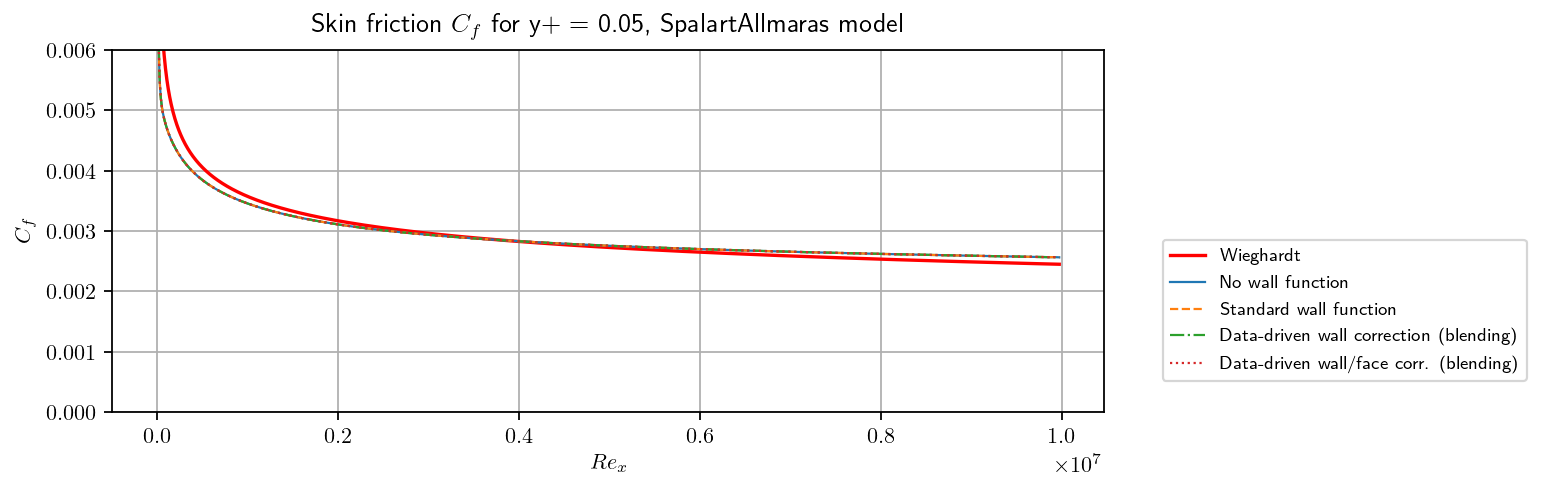

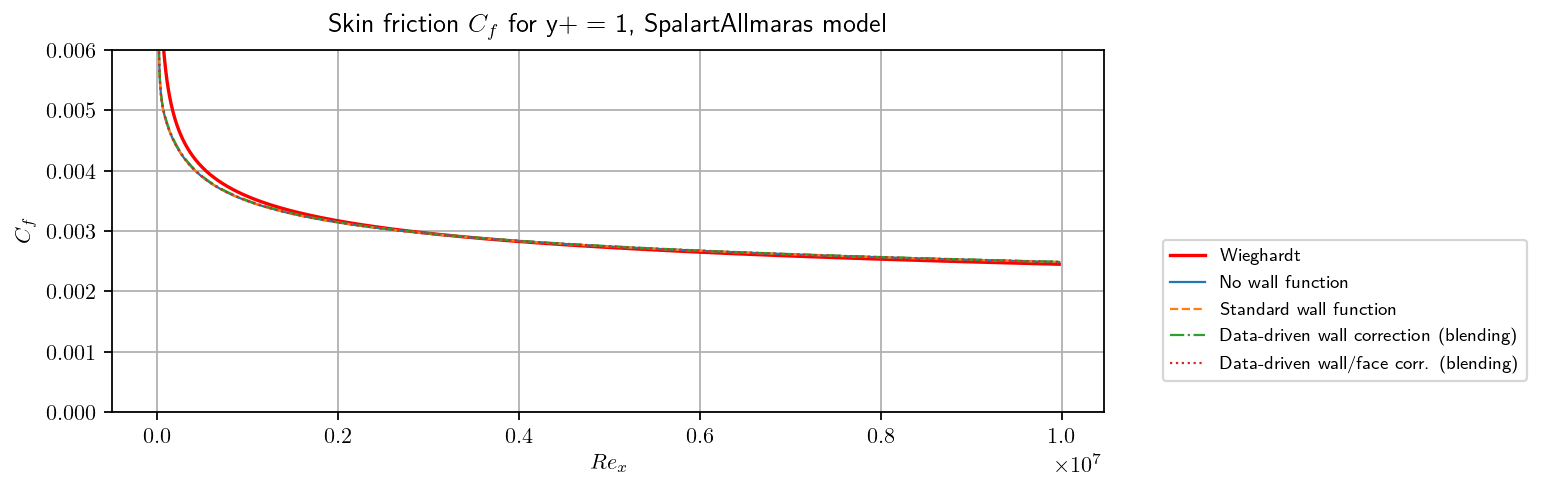

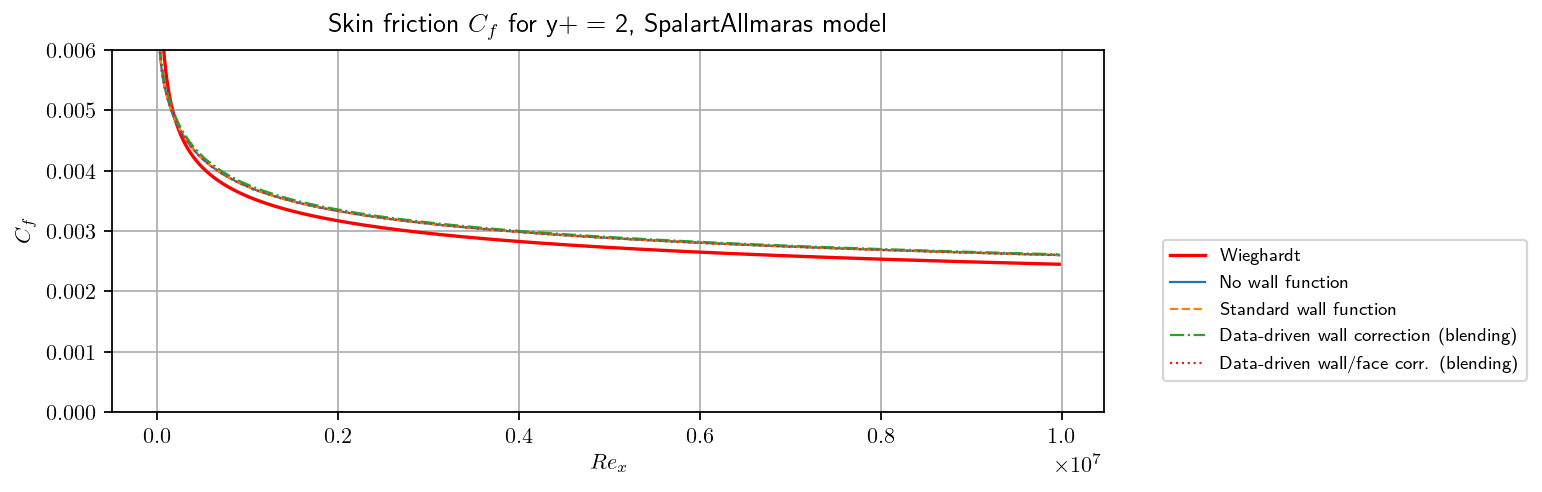

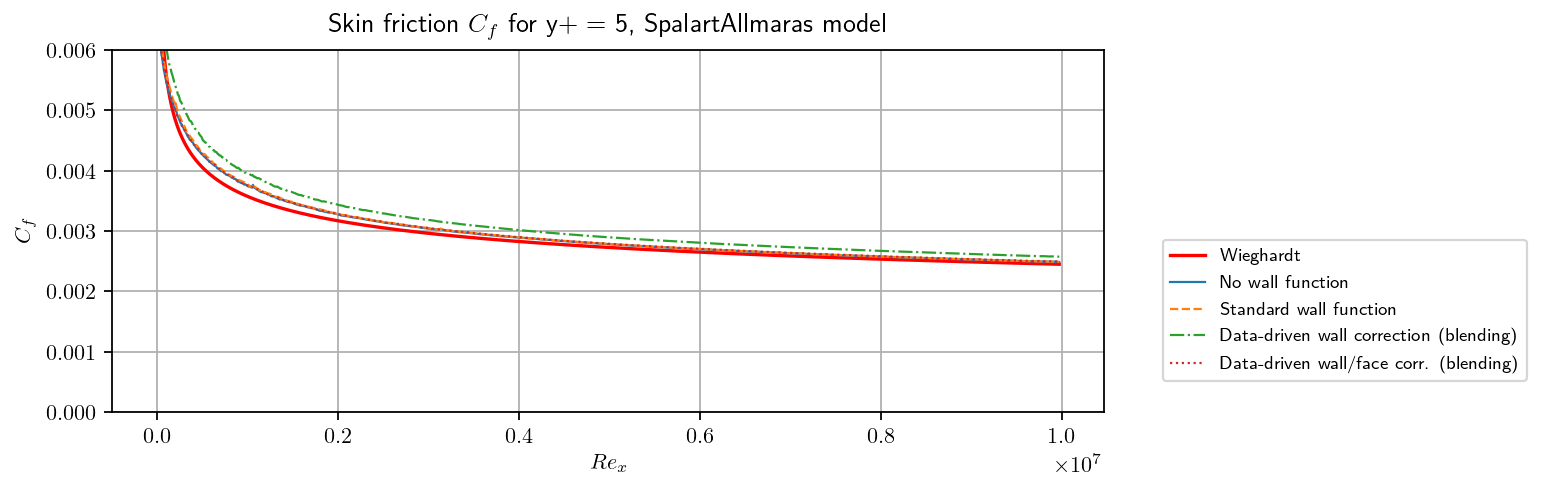

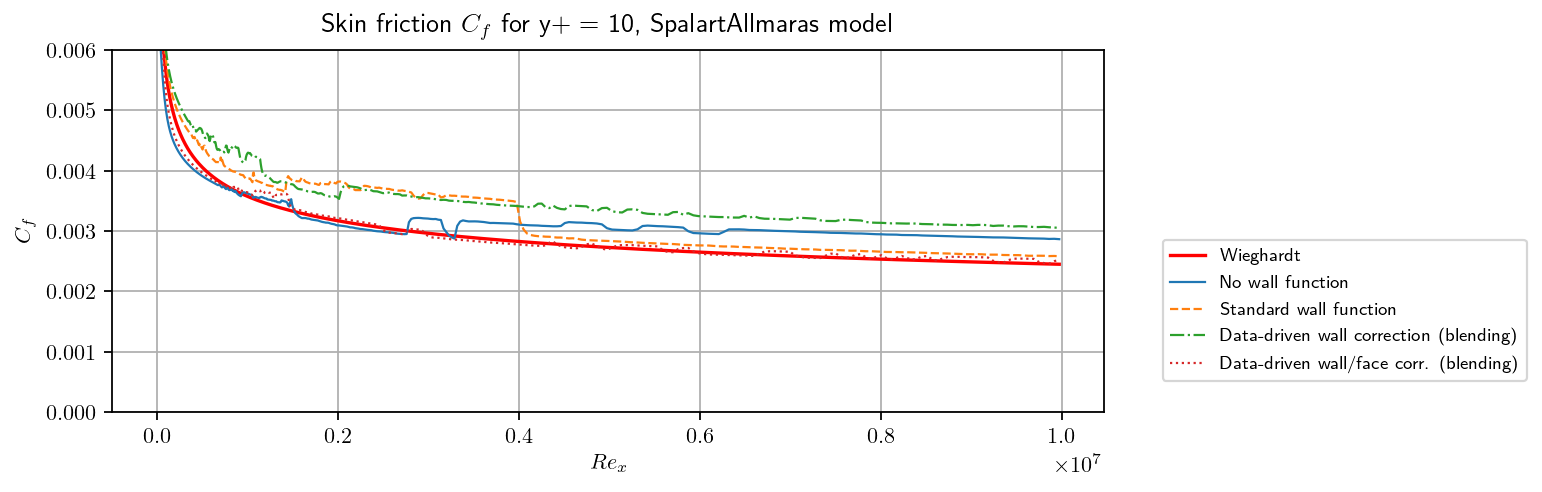

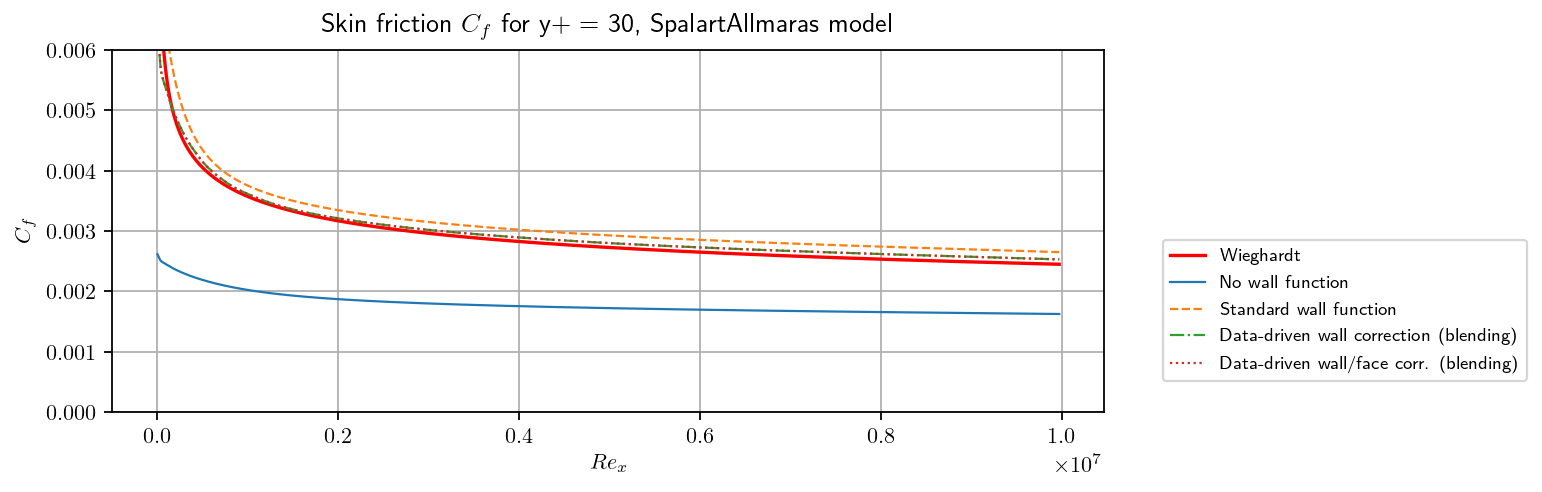

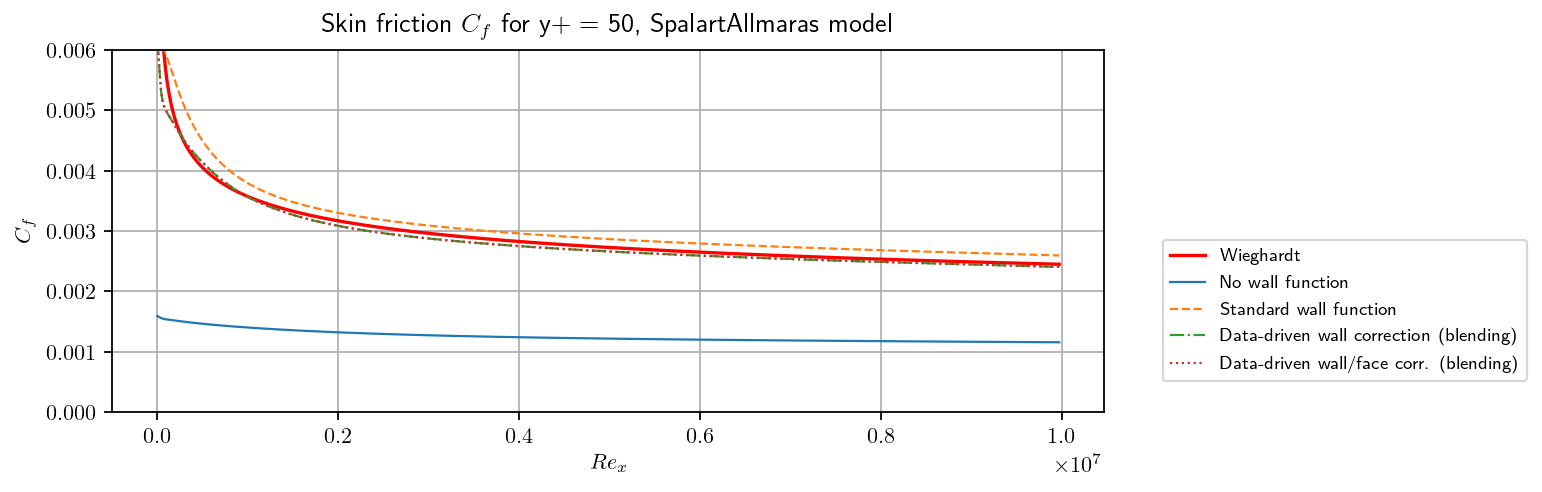

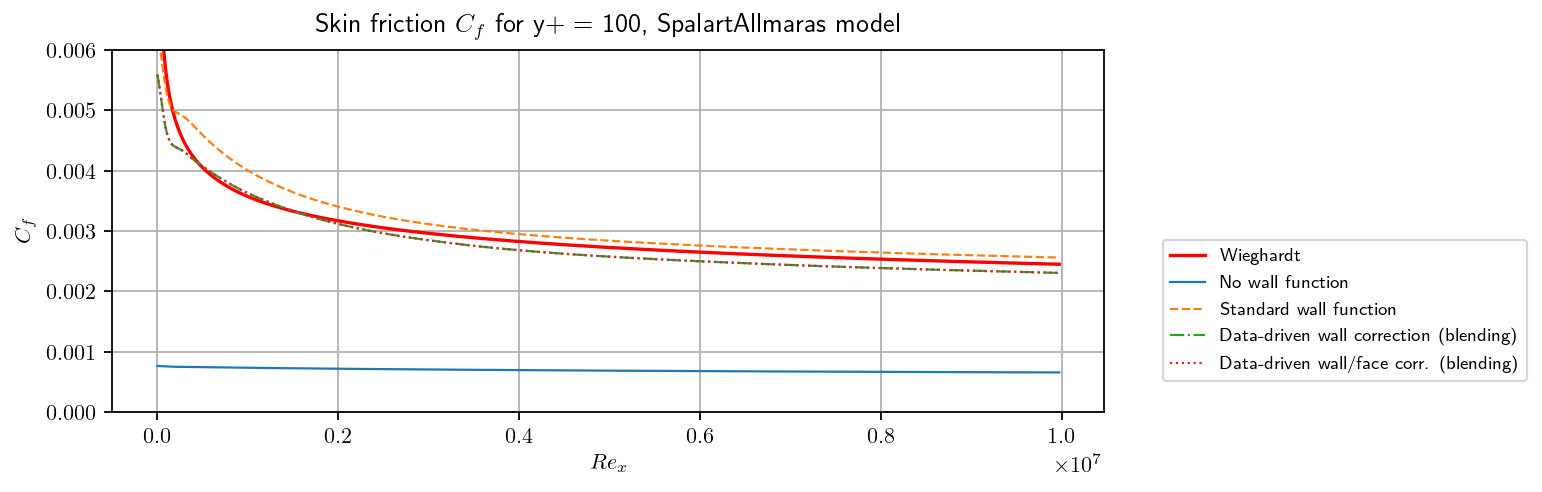

In [9]:
style = ["-", "--", "-.", ":"]
lw = 1.0
for j in range(len(yp)):
    fig, ax = plt.subplots(1, 1, figsize=(8, 3))
    plt.ylim([0, 0.006])
    plt.grid()
    ax.set_xlabel(r"$Re_x$")
    ax.set_ylabel(r"$C_f$")
    plt.title(r"Skin friction $C_f$ for y+ = {}, {} model".format(yp[j], model_sa))
    ax.plot(Rex, wieghardt, color = "r", label = "Wieghardt")    
    for i in range(len(res_list)):
        ax.plot(Rex, Cf_nowall[i + len(res_list)*j], label = "No wall function", ls = style[i], c = "C{:d}".format(i), lw = lw)
        ax.plot(Rex, Cf_wall[i + len(res_list)*j], label = "Standard wall function", ls = style[i+1], c = "C{:d}".format(i+1), lw = lw)
        ax.plot(Rex, Cf_ddwall[i + len(res_list)*j], label = "Data-driven wall correction (blending)", ls = style[i+2], c = "C{:d}".format(i+2), lw = lw)
        ax.plot(Rex, Cf_ddface[i + len(res_list)*j], label = "Data-driven wall/face corr. (blending)", ls = style[i+3], c = "C{:d}".format(i+3), lw = lw)
        ax.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.5))        

### Comparison *Cf* of the case without wall function for different *y+*

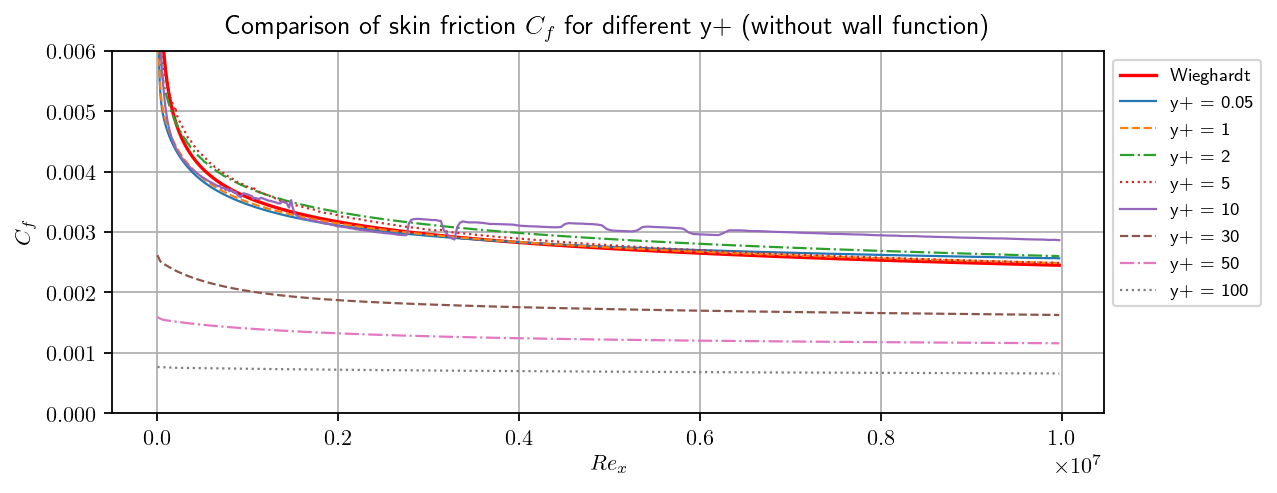

In [10]:
style2 = ["-", "--", "-.", ":"]
lw2 = 1.0
stylecycler = cycle(style2)

fig2, ax2 = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.006])
plt.grid()
ax2.set_xlabel(r"$Re_x$")
ax2.set_ylabel(r"$C_f$")
plt.title(r"Comparison of skin friction $C_f$ for different y+ (without wall function)")
ax2.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
for j in range(len(yp)):
    for i in range(len(res_list)):
        ax2.plot(Rex, Cf_nowall[i + len(res_list)*j], label = "y+ = {}".format(yp[j]), ls = next(stylecycler), c = "C{:d}".format(j), lw = lw2)
        ax2.legend(fontsize = 8, bbox_to_anchor=(1, 1))

### Comparison *Cf* of the case with wall function for different *y+*

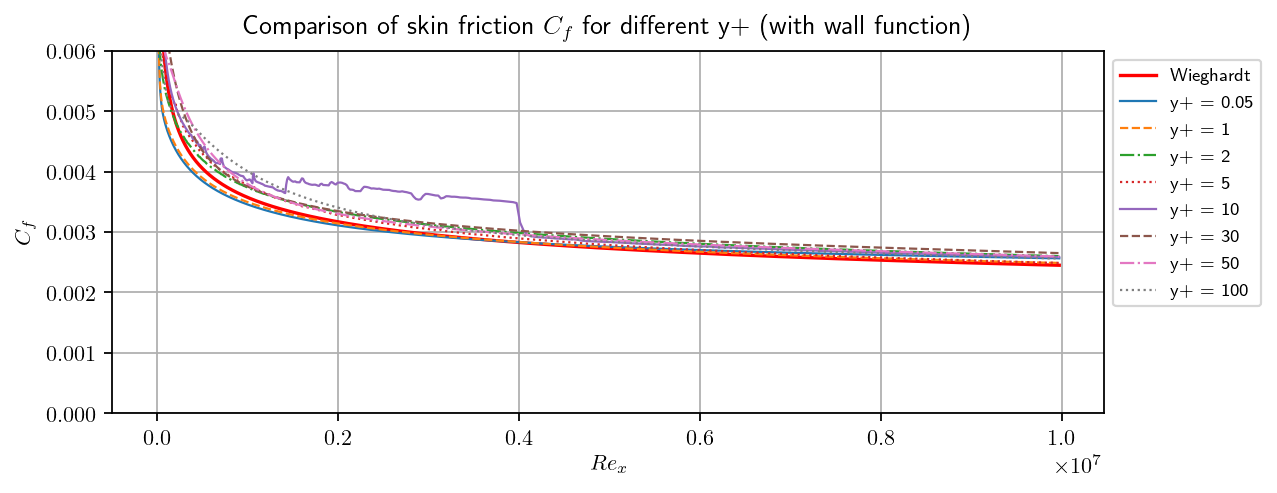

In [11]:
fig2_b, ax2_b = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.006])
plt.grid()
ax2_b.set_xlabel(r"$Re_x$")
ax2_b.set_ylabel(r"$C_f$")
plt.title(r"Comparison of skin friction $C_f$ for different y+ (with wall function)")
ax2_b.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
for j in range(len(yp)):
    for i in range(len(res_list)):
        ax2_b.plot(Rex, Cf_wall[i + len(res_list)*j], label = "y+ = {}".format(yp[j]), ls = next(stylecycler), c = "C{:d}".format(j), lw = lw2)
        ax2_b.legend(fontsize = 8, bbox_to_anchor=(1, 1))

### Comparison *Cf* of data-driven wall modeling with the correction at the wall for different *y+*

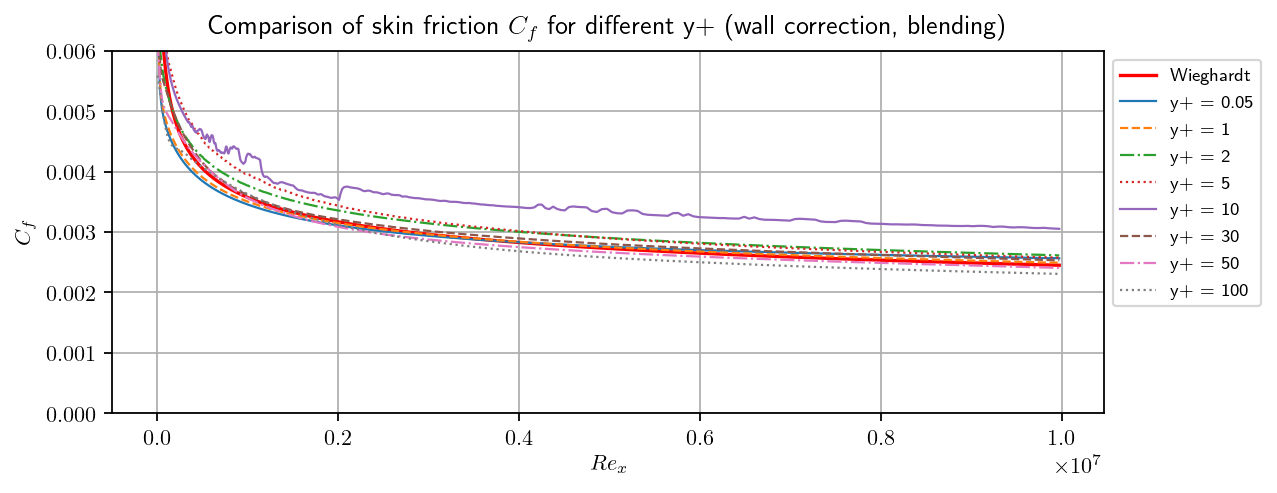

In [12]:
style3 = ["-", "--", "-.", ":"]
lw3 = 1.0
stylecycler2 = cycle(style3)

fig3, ax3 = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.006])
plt.grid()
ax3.set_xlabel(r"$Re_x$")
ax3.set_ylabel(r"$C_f$")
plt.title(r"Comparison of skin friction $C_f$ for different y+ (wall correction, blending)")
ax3.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
for j in range(len(yp)):
    for i in range(len(res_list)):
        ax3.plot(Rex, Cf_ddwall[i + len(res_list)*j], label = "y+ = {}".format(yp[j]), ls = next(stylecycler2), c = "C{:d}".format(j), lw = lw3)
        ax3.legend(fontsize = 8, bbox_to_anchor=(1, 1))

### Comparison *Cf* of data-driven wall modeling with the correction at the first face for different *y+*

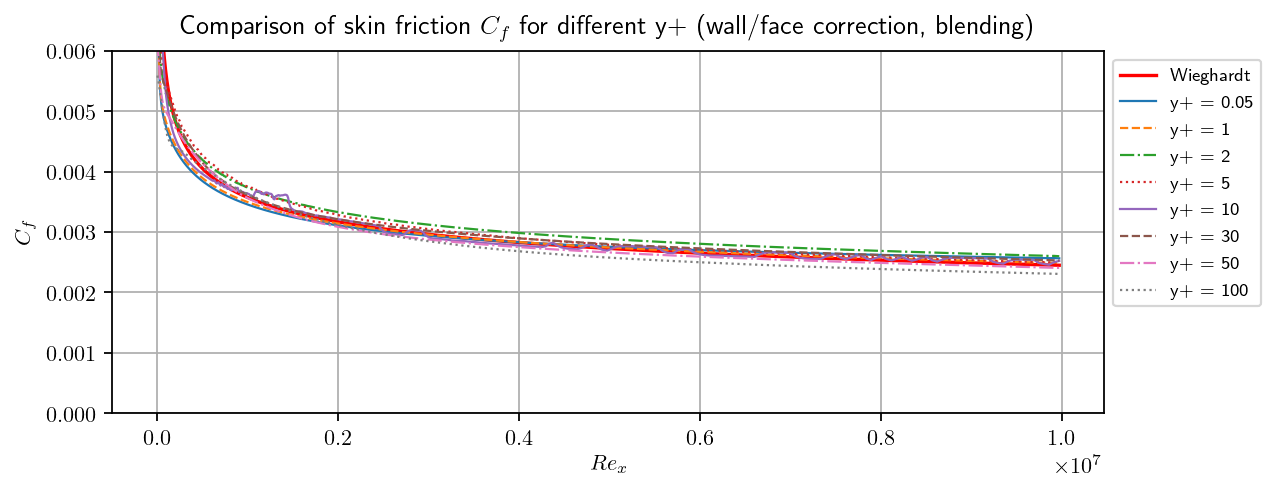

In [13]:
style4 = ["-", "--", "-.", ":"]
lw4 = 1.0
stylecycler3 = cycle(style4)

fig4, ax4 = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.006])
plt.grid()
ax4.set_xlabel(r"$Re_x$")
ax4.set_ylabel(r"$C_f$")
plt.title(r"Comparison of skin friction $C_f$ for different y+ (wall/face correction, blending)")
ax4.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
for j in range(len(yp)):
    for i in range(len(res_list)):
        ax4.plot(Rex, Cf_ddface[i + len(res_list)*j], label = "y+ = {}".format(yp[j]), ls = next(stylecycler3), c = "C{:d}".format(j), lw = lw4)
        ax4.legend(fontsize = 8, bbox_to_anchor=(1, 1))

### Comparison of Cf between standard wall function and data-driven wall model

In [14]:
mean_Cf_nowall = np.array([Cf_nowall[:, i].mean() for i in range(Cf_nowall.shape[1])])
mean_Cf_wall = np.array([Cf_wall[:, i].mean() for i in range(Cf_wall.shape[1])])
mean_Cf_ddwall = np.array([Cf_ddwall[:, i].mean() for i in range(Cf_ddwall.shape[1])])
mean_Cf_ddface = np.array([Cf_ddface[:, i].mean() for i in range(Cf_ddface.shape[1])])

In [15]:
std_Cf_nowall = np.array([np.std(Cf_nowall[:, i]) for i in range(Cf_nowall.shape[1])])
std_Cf_wall = np.array([np.std(Cf_wall[:, i]) for i in range(Cf_wall.shape[1])])
std_Cf_ddwall = np.array([np.std(Cf_ddwall[:, i]) for i in range(Cf_ddwall.shape[1])])
std_Cf_ddface = np.array([np.std(Cf_ddface[:, i]) for i in range(Cf_ddface.shape[1])])

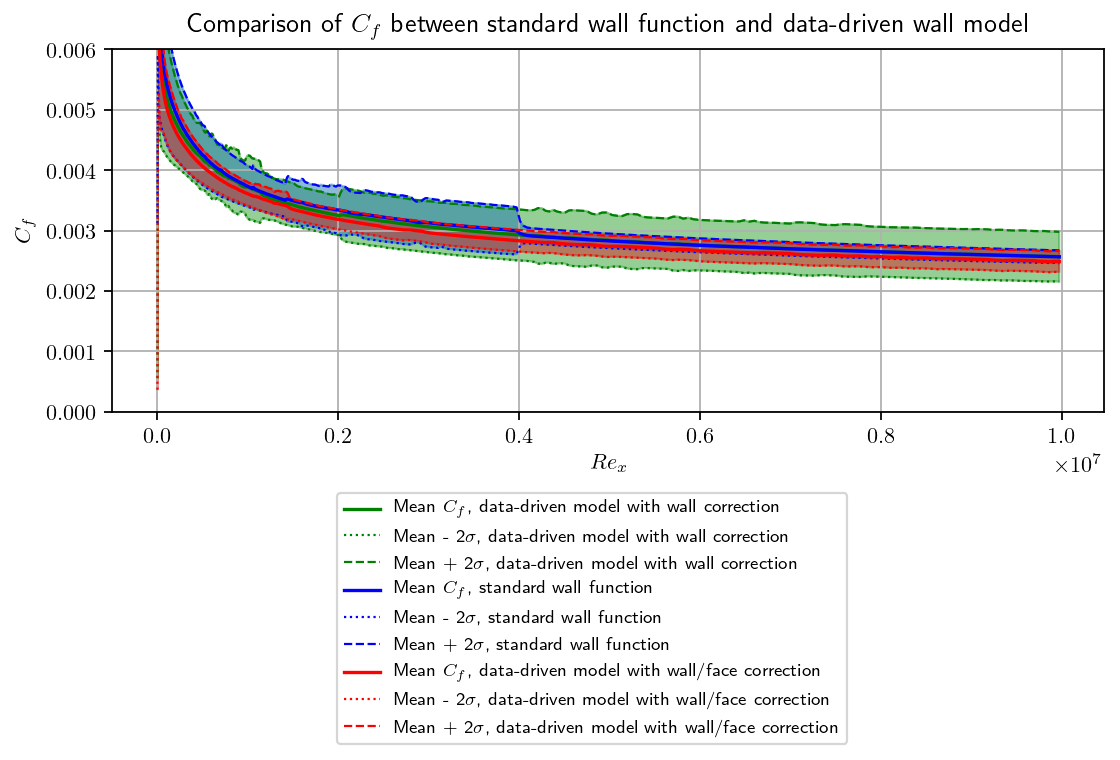

In [16]:
style = ["-", "--", ":"]
lw = 1.0

fig, ax = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.006])
plt.grid()
ax.set_xlabel(r"$Re_x$")
ax.set_ylabel(r"$C_f$")
plt.title(r"Comparison of $C_f$ between standard wall function and data-driven wall model")
ax.plot(Rex, mean_Cf_ddwall, color = "g", label = r"Mean $C_f$, data-driven model with wall correction")
ax.plot(Rex, mean_Cf_ddwall - 2*std_Cf_ddwall, label = r"Mean - 2$\sigma$, data-driven model with wall correction", ls = style[2], c = "g", lw = lw)
ax.plot(Rex, mean_Cf_ddwall + 2*std_Cf_ddwall, label = r"Mean + 2$\sigma$, data-driven model with wall correction", ls = style[1], c = "g", lw = lw)
plt.fill_between(Rex, mean_Cf_ddwall - 2*std_Cf_ddwall, mean_Cf_ddwall + 2*std_Cf_ddwall, color = "C{:d}".format(2), alpha=0.5)
ax.plot(Rex, mean_Cf_wall, color = "b", label = r"Mean $C_f$, standard wall function")
ax.plot(Rex, mean_Cf_wall - 2*std_Cf_wall, label = r"Mean - 2$\sigma$, standard wall function", ls = style[2], c = "b", lw = lw)
ax.plot(Rex, mean_Cf_wall + 2*std_Cf_wall, label = r"Mean + 2$\sigma$, standard wall function", ls = style[1], c = "b", lw = lw)
plt.fill_between(Rex, mean_Cf_wall - 2*std_Cf_wall, mean_Cf_wall + 2*std_Cf_wall, color = "C{:d}".format(0), alpha=0.5)
ax.plot(Rex, mean_Cf_ddface, color = "r", label = r"Mean $C_f$, data-driven model with wall/face correction")
ax.plot(Rex, mean_Cf_ddface - 2*std_Cf_ddface, label = r"Mean - 2$\sigma$, data-driven model with wall/face correction", ls = style[2], c = "r", lw = lw)
ax.plot(Rex, mean_Cf_ddface + 2*std_Cf_ddface, label = r"Mean + 2$\sigma$, data-driven model with wall/face correction", ls = style[1], c = "r", lw = lw)
plt.fill_between(Rex, mean_Cf_ddface - 2*std_Cf_ddface, mean_Cf_ddface + 2*std_Cf_ddface, color = "C{:d}".format(3), alpha=0.5)
ax.legend(fontsize = 8, bbox_to_anchor=(0.75, -0.2))